In [1]:
#import the library for data analysis, this can be used like excel.(pandas is better for data modification and aggregation)
import pandas as pd
import numpy as np
# read the train data and test data
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [2]:
train.head()
# Pclass: ticket class (1:upper-clase, 2:middle-class, 3:lower-class)
# SlbSp: the number of siblings/spouses aboard the ship
# Parch: the number of parents/children aboard the ship
# Ticket: the ticket number
# Fare: the ticket price
# Cabin: cabin where the passenger stayed
# Embarked: the port at which the passenger boarded the vessel, where C is for Cherboug, Q is for 
# Queenstown, and S is for Southampton

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


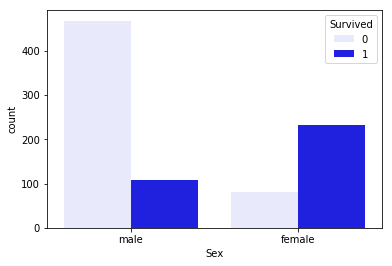

In [3]:
## try to compare the surviver between male and female
#import 2D plotting library
import matplotlib.pyplot as plt
# import statistical data visualization based on matplotlib
import seaborn as sns
# the function to output graph on jupyternotebook
%matplotlib inline
# shows the counts of observation in sex and survived using bars
sns.countplot('Sex',hue='Survived',data=train, color = 'blue')

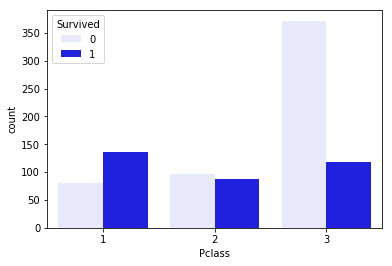

In [4]:
## try to compare the surviver between the rich (class:1) and the poor (class:2) 
# you can see that the rich is more survived than the poor
#import 2D plotting library
import matplotlib.pyplot as plt
# import statistical data visualization based on matplotlib
import seaborn as sns
# the function to output graph on jupyternotebook
%matplotlib inline
# shows the counts of observation in sex and survived using bars
sns.countplot('Pclass',hue='Survived',data=train, color = 'blue')

In [5]:
# take a look at train file
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# take a look at the number of the passenger in both train and test data
test_shape = test.shape
train_shape = train.shape
#output matrix of test and train
print(test_shape)
# the number of passenger:418, the number of column:11
print(train_shape)
# the number of passenger:891, the number of column:12

(418, 11)
(891, 12)


In [7]:
#look at statistical information on test data in order to check the missing value
# it looks like age and fare have missing value.
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
#look at statistical information on train data to check the missing value
#compared test data with train data, it looks like age has missing value.
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
#find the data of missing value with the total namber and percentage in a descending order
total = train.isnull().sum().sort_values(ascending=False)
percent_1 = train.isnull().sum()/train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data_value = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data_value.head(4)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0


In [10]:
#output all features in columns
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [11]:
# make sure the all missing value of each column in train dataset
# It is rare that it is 100% data available in the provided (or used) dataset. It is almost always the case that some data is missing or it can not be used because its credibility is low.
# Let's check the missing value in train data 
# search missing dataset in train by using isnull(), and creates a function called missing_value() that returns the missing dataset for each column.
def missing_value(df): 
        null_val = df.isnull().sum()
        percent = 100 * df.isnull().sum()/len(df)
        missing_value = pd.concat([null_val, percent], axis=1)
        missing_value_ren_columns = missing_value.rename(
        columns = {0 : 'the number of missing value on train data', 1 : '%'})
        return missing_value_ren_columns
missing_value(train)
# the result shows there are number of missing value in Age, Embarked and Sex.

,the number of missing value on train data,%
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [12]:
# make sure the missing value in test dataset
# It is rare that it is 100% data available in the provided (or used) dataset. It is almost always the case that some data is missing or it can not be used because its credibility is low.
# Let's check the missing value in test data 
# search missing dataset in train by using isnull(), and creates a function called missing_value() that returns the missing dataset for each column.

def missing_value(df): 
        null_val = df.isnull().sum()
        percent = 100 * df.isnull().sum()/len(df)
        missing_value = pd.concat([null_val, percent], axis=1)
        missing_value_ren_columns = missing_value.rename(
        columns = {0 : 'the number of missing value on test data', 1 : '%'})
        return missing_value_ren_columns
 
missing_value(test)
# the result shows there are large number of missing value in Age, Fare and Cabin.

,the number of missing value on test data,%
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,86,20.574163
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,1,0.239234
Cabin,327,78.229665


In [13]:
## preprocess the dataset including missing data 
#  1.Replace missing data with surrogate data
#  2.Convert character string categorical data to numbers

# Let's clean train dataset. There were missing data in three columns "Age", "Embarked" and "Cabin" in train. 
# Since "Cabin" is too many missing value; therefore I don't use 
# therefore let's clean up the two missing data "Age" and "Embarked".
# "Age", let's simply use the median of all data of train as surrogate data. (It is very important and big discussion as to what to use with surrogate data and what kind of processing to add, but I will think about it simply here)

# Next is "Embarked" (departure point), but here too only two missing data are included in the train.
# When checking other data, "S" was the most frequent value, let's use "S" as proxy data.

train["Age"] = train["Age"].fillna(train["Age"].median())
train["Embarked"] = train["Embarked"].fillna("S")

# fill in surrogate data using fillna () in each column. 
# check if there is missing data using sesson_table () we made above. 
# Cabin is not used this time, so it's no problem even if missing data is available, only if the missing data of "Age" and "Embarked" are buried.
missing_value(train)

,the number of missing value on test data,%
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [14]:
# Now that the missing data has been processed, 
# convert the categorical data string to a number next. 
# Columns that have character strings as values in the items used in this forecast are "Sex" and "Embarked". 
# Sex is the two character strings "male" and "female".
# Embarked is three character strings "S" "C" "Q". 
# Let's convert these to numbers.

#train["Sex"][train["Sex"] == "male"] = 0
#train["Sex"][train["Sex"] == "female"] = 1
#train["Embarked"][train["Embarked"] == "S" ] = 0
#train["Embarked"][train["Embarked"] == "C" ] = 1
#train["Embarked"][train["Embarked"] == "Q"] = 2
train["Sex"] = train["Sex"].map({"male" : 0, "female" : 1})
train["Embarked"] = train["Embarked"].map({"S" : 0, "C" : 1, "Q" : 2})
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0


In [15]:
# we converted the median value to "Age" and the numerical value of the string value (Age and Embarked). 
# Furthermore, in test, there was only one deficiency in "Fare", so here as well as median (Median) is included as a proxy. 
# make sure to check the contents of the data with head ().

test["Age"] = test["Age"].fillna(test["Age"].median())
test["Sex"] = test["Sex"].map({"male" : 0, "female" : 1})
test["Embarked"] = test["Embarked"].map({"S" : 0, "C" : 1, "Q" : 2})
test.Fare[152] = test.Fare.median()
 
test.head(3)

C:\Users\k\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2


In [16]:
train.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.034212,-0.057527,-0.001652,0.012658,-0.030467
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.064910,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.339898,0.083081,0.018443,-0.549500,0.045702
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.081163,0.114631,0.245489,0.182333,0.116569
Age,0.034212,-0.064910,-0.339898,-0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.009165
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.233296,1.000000,0.414838,0.159651,-0.059961
Parch,-0.001652,0.081629,0.018443,0.245489,-0.172482,0.414838,1.000000,0.216225,-0.078665
Fare,0.012658,0.257307,-0.549500,0.182333,0.096688,0.159651,0.216225,1.000000,0.062142
Embarked,-0.030467,0.106811,0.045702,0.116569,-0.009165,-0.059961,-0.078665,0.062142,1.000000


In [17]:
# import tree
from sklearn import tree

In [18]:
# Prediction model1
# predict "survived" by using the 3 items "Pclass" "Sex" "Age"

# get the values of target variable and imput variable on train data.
target = train["Survived"].values
features_1 = train[["Pclass", "Sex", "Age" ]].values
 
# buiding decision tree ※ I intentionally used default parameter to make comparison among another model
my_tree_1 = tree.DecisionTreeClassifier()
my_tree_1 = my_tree_1.fit(features_1, target)
 
# get the value of imput variable of "test" (only three imput variable:Pclass, Sex, and Age)
test_features = test[["Pclass", "Sex", "Age"]].values
 
# predict with "my_tree_1" model using explanatory variable on test data
my_prediction = my_tree_1.predict(test_features)
 

In [19]:
# make sure the size of prediction data
my_prediction.shape

(418,)

In [20]:
# check the contents of the prediction data, if the output result is binary, that's no problem
print(my_prediction) 

[0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0
 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0
 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0
 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1
 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 0
 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1
 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0
 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1
 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0
 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0
 0 1 0 1 1 1 1 1 0 1 1]


In [21]:
# get the PassengerId
PassengerId = np.array(test["PassengerId"]).astype(int)
 
# put my_prediction (prediction data) and PassengerId into the dataframe
my_solution = pd.DataFrame(my_prediction, PassengerId, columns = ["Survived"])
 
# export as my_tree_one.csv
my_solution.to_csv("my_tree1.csv", index_label = ["PassengerId"])

In [22]:
## prediction model2 
# get the values of target variable and imput variable on train data.
target_2 = train["Survived"].values
features_2 = train[["Pclass", "Sex", "Age","Fare", "SibSp", "Parch", "Embarked" ]].values

# building decision tree with 7 imput valuables
my_tree_2 = tree.DecisionTreeClassifier()
my_tree_2 = my_tree_2.fit(features_2, target_2)

# get the value of imput variable of "test" 
test_features_2 = test[["Pclass", "Sex", "Age","Fare", "SibSp", "Parch", "Embarked" ]].values

In [23]:
# Use the decision tree of "part2" to make predictions and export to CSV
my_prediction_tree_2 = my_tree_2.predict(test_features_2)

# get the PassengerId
PassengerId = np.array(test["PassengerId"]).astype(int)

# put my_prediction (prediction data) and PassengerId into the dataframe
my_solution_tree_2 = pd.DataFrame(my_prediction_tree_2, PassengerId, columns = ["Survived"])

# export as my_tree_2.csv
my_solution_tree_2.to_csv("my_tree2.csv", index_label = ["PassengerId"])
